In [1]:
import seaborn as sns

import sklearn
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import consensus_score

import scipy.linalg
from functools import partial
%pylab
%matplotlib inline
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import scipy.sparse as sparse
from scipy import stats
from __future__ import print_function
import gc
from tqdm import tqdm_notebook as tqdm
from __future__ import division
import pandas as pd
import seaborn as sb
import os
from scipy.spatial import distance
from scipy.cluster import hierarchy
from pandas import DataFrame

import os, sys, datetime
LF_CODE_PATH = os.path.expanduser('~/projects/LFAnalyze/code')
FT_CODE_PATH = os.path.expanduser('~/projects/fishTrax/code/analysis/')
FD_CODE_PATH = os.path.expanduser('~/projects/fish_despair_notebooks/src/')
sys.path.insert(0,LF_CODE_PATH)
sys.path.insert(0,FT_CODE_PATH)
sys.path.insert(0,FD_CODE_PATH)

import passivity_2p_imaging_utils as p2putils
import visualization_utils as vizutil
import matplotlib.cm as cm
from matplotlib.colors import Normalize
reload(p2putils)
tmp_dir = '/tmp/'
all_data = p2putils.get_all_datasets(tmp_dir=tmp_dir)

from scipy import signal

import holoviews as hv
hv.extension('matplotlib')
pyplot.switch_backend('agg')
%output fig='svg' size=300

/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
def safe_round_mean(x):
    m = np.round(np.mean(x))
    if np.isnan(m):
        return 0
    else:
        return int(m)

def safe_mean(x):
    m = np.mean(x)
    if np.isnan(m):
        return 0
    else:
        return np.mean(x)

In [4]:
#Params:
bTop = True
bOneFish = False # only run first fish for interactive development
# vmax = None # set to 95%
vmax = 100 
bSymmetric_vmax = False # We don't care about f-val < 1, but do when taking diff
plot_dir = "/data2/Plots/granger/vmax=100_norm_f_count"

reduce_func = lambda x: sum(x>100)/np.size(x)
# reduce_func = safe_round_mean
brain_map_reduce = safe_mean


# If the values are integers then
# the number of chords is directly scaled by the value, if the
# values are floats then the number of chords are apportioned such
# that the lowest value edge is given one chord and all other nodes
# are given nodes proportional to their weight.
chord_val_integer = True
chord_val_min = 1

# reduce_func = np.mean
# chord_val_integer = False
# chord_val_min = 1e-5



conds = ['shock','reexposed','control',]
fishids = [['f01606','f01604','f01547','f01550','f01553'],#,'f01597','f02326','f01520','f01527',],
           ['f01555','f01575','f01576','f01594','f01598'],
           ['f01736','f01732','f01733','f01735','f01729']]#,'f

In [5]:
regions = [u'in_l_vthal', u'in_r_vthal', u'in_l_raphe',
           u'in_r_raphe', u'in_l_dthal', u'in_r_dthal',
           u'in_l_LHb', u'in_r_LHb', u'in_l_tel', u'in_r_tel',
           u'in_l_MHb', u'in_r_MHb']
region_names = [r[3:] for r in regions]

In [6]:
def prepInputChordDiagram(Ms, target_bndx, region_bndxs,
                          target_name, region_names, func,
                          min_val=1e-5, integer=False):
    """
    Inputs:
    Ms is list of one or more (G or fval matrices)
    target_bndx is a boolean array speciifying the set of cells to which we want to understand the input.
    region_bndxs is a list of boolean arrays specifying a set of regions in the brain.
    target_name is the string of the target region
    region_names is a list of strings that must contain target_name
    func is a function mean, std.. that will be used to summarize the set of inputs between one region and another.
    min_val is a positive float that determines the minimum connection between regions
    integer will interpret each value as an int rather than float, and will usually increase # of lines
    """
    ret = None
    for iM, M in enumerate(Ms):
        # select columns corresponding with target region.
        target = M[:,target_bndx]
        for iR, region_bndx in enumerate(region_bndxs):
            # select rows associated with region
            block = target[region_bndx]
            # summarize the remaining block with the summary function 
            summary = func(block)
            if type(summary) is int:
                sum_shape = ()
            else:
                sum_shape=summary.shape
            if ret is None:
                ret = np.zeros([len(Ms), len(region_bndxs)] + list(sum_shape))
            ret[iM, iR] = summary
    # This yields a tensor of len(Ms, ie. #fish) x #input regions x dim(domain of func).
    # if func returns a scalar, this will be a matrix
    
    # make links df for chord
    links = DataFrame(0, index=np.arange(np.product(ret.shape)),
                  columns=["group", "source", "target", "value"])
    nodes = hv.Dataset(DataFrame(data=
                    {"index": np.arange(len(region_names)),
                    "name": region_names}),
                'index')
    target_idx = region_names.index(target_name)
    ncol = ret.shape[1]
    for iF, iS in np.ndindex(ret.shape):
        
        val = ret[iF,iS]
        if np.isnan(val) or val<=min_val:
            val = min_val
        else:
            if integer:
                val = int(val)
            else:
                val = float(val)
        links.iloc[iF*ncol+iS] = [iF, iS, target_idx, val]
    # return this tensor for doing statistiic and plot chord diagram
    return ret, links, nodes

def plotChordDiagram(links, nodes, group_n=None):
    options = {"Chord": 
               {"label_index": 'name',
                "color_index": 'name',
                "edge_color_index": 'source',
                "cmap": 'Category20',
                "edge_cmap": 'Category20'}
              }
    if group_n:
        dat = links.query('group=={}'.format(group_n))
    else:
        dat = links
    fig = hv.Chord(
            (dat, nodes),
            ['source', 'target'],
            ['value']).options(options)
    return fig


def prepDeltaInputChordDiagram(Ms_1, Ms_2, target_bndx, region_bndxs,
                          target_name, region_names, func,
                          min_val=1e-5):
    #subtracts Ms1 and Ms2, then call the above function I guess...
    diffM = [m1 - m2 for m1, m2 in zip(Ms_1, Ms_2)]
    return plotInputChordDiagram(diffM, target_bndx, region_bndxs,
                                 target_name, region_names, func,
                                min_val)

def plotInputBrainMap( M, df, target_bndx, Z, back_img, func, vmax=None, symmetric_vmax=False):
    """
    Inputs:
    M the G or fval matric
    df is the roi dataframe
    target_bndx is a boolean array specifying the set of cells to which we want to understand the input.
    Z: list of z-plane indices eg [0,2,4,6,8]
    back_img: list of background images of dim(Z+1), where 0 is max Z-project
    func is a function mean, std.. that will be used to summarize the set of inputs between one region and another.
    """
    # select columns corresponding with target region.
    target = M[:,target_bndx]
    # summarize across columns using the function 
    neurons_summary = np.apply_along_axis(func, 1, target)
    # This yields a vector of len #neurons.
    
    # Colormap
    cmap_ = cm.inferno
    if not vmax:
        vmax = np.percentile(fvals[0],95)
    if symmetric_vmax:
        vmin = -vmax
    else:
        vmin = 0
    norm_ = Normalize(vmin=vmin, vmax=vmax)
    m = cm.ScalarMappable(norm=norm_, cmap=cmap_)
    cmap = lambda x: m.to_rgba(x)[:3]
    
    
    # Plot each plane the rois colored based on the vector on top of the brain.
    fig, ax = plt.subplots(nZ+2, 1, figsize=[8,4*nZ],
                           gridspec_kw={"height_ratios":[0.05] + list(np.ones(nZ+1))})
    cb1 = mpl.colorbar.ColorbarBase(ax[0], cmap=cmap_,
                                norm=norm_,
                                orientation='horizontal')
    imgs = []
    for iz, z in enumerate(Z):
        idx = df.z==z
        #Select rois in raphe in this slices, and get their coordinates.
        coords = df[idx].coords
        weights = neurons_summary[idx]
        my_colors = np.array(map(cmap, weights))
        #Overlay the ROIs on the background image and display:
        img = vizutil.overlay_coords(back_img[iz], coords, my_colors, alpha=0.5)
        imgs.append(img)
        ax[iz+2].imshow(img,interpolation='nearest')
        ax[iz+2].set_title("z={}".format(z))
    img = np.array(imgs).max(0)
    ax[1].imshow(img,interpolation='nearest')
    ax[1].set_title("max z-project")
    
    plt.tight_layout()
    
    # Plot a z-project of all the rois
    return fig, neurons_summary

def plotDeltaInputBrainMap( M1, M2, df, target_bndx, Z, back_img, func):
    diffM = M1 - M2
    return plotInputBrainMap(diffM, df, target_bndx, Z, back_img, func)

In [7]:
# turn off interactive plotting
plt.ioff()

In [8]:
for ncond, cond in enumerate(conds):
    for nf, fid in enumerate(fishids[ncond]):
        f = p2putils.get_fish(all_data,fid)[0]
        print('Starting', f.fishid)
        
        #Load data
        fn = f.data_prefix+'_granger_OLS.npz'
        data = np.load(fn)
        fvals = data["fvals"]
        gbeta = data["gbeta"]
        nbeta = data["nbeta"]
        g_dof = data["g_dof"]
        n_dof = data["n_dof"]
        neuron_ids = data["neuron_ids"]
        time_windows = data["time_windows"]
        exclude_frames = data["exclude_frames"]
        lag = data["lag"]
        df = f.get_roi_table()
        df = df.iloc[neuron_ids]
        df.reset_index(drop=True, inplace=True)
        
        Z = np.arange(0,f.num_zplanes)
        nZ = len(Z)
        back_img = []
        for z in Z:
            back_img.append(np.power(f.get_tif_rasl_as_vol(z,range(1,200)).mean(axis=2),.4))
        
        print("finished loading data. Making plots...")
        # MAKE PLOTS
        target_name = "r_raphe"
        target_bndx = np.array(df["in_"+target_name])
        region_bndxs = [np.array(df[r]) for r in regions]
        
        # PLOT
        _, links, nodes = prepInputChordDiagram(fvals, target_bndx, region_bndxs,
                              target_name, region_names, reduce_func,
                              min_val=chord_val_min, integer=chord_val_integer)
        for t in range(len(time_windows)):
            chord_fig = plotChordDiagram(links, nodes, group_n=t)
            brain_map_fig, _ = plotInputBrainMap(fvals[t], df, target_bndx, Z, back_img, brain_map_reduce, vmax=vmax, symmetric_vmax=bSymmetric_vmax)
            
            # SAVE PLOT
            plot_fn = "{}_target={}_window={}".format(
                f.fishid, target_name, t)
            hv.output(chord_fig, filename=plot_dir+plot_fn+"_fval.svg")
            brain_map_fig.savefig(plot_dir+plot_fn+"_brain_map.svg")

        print('Done', f.fishid)#, fn)
        if bOneFish:
            break
    if bOneFish:
        break

Starting f01606
finished loading data. Making plots...
Done f01606
Starting f01604
finished loading data. Making plots...
Done f01604
Starting f01547
finished loading data. Making plots...
Done f01547
Starting f01550
finished loading data. Making plots...
Done f01550
Starting f01553
finished loading data. Making plots...
Done f01553
Starting f01555
finished loading data. Making plots...
Done f01555
Starting f01575
finished loading data. Making plots...


/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Done f01575
Starting f01576
finished loading data. Making plots...
Done f01576
Starting f01594
finished loading data. Making plots...


/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in greater


Done f01594
Starting f01598
finished loading data. Making plots...
Done f01598
Starting f01736
finished loading data. Making plots...
Done f01736
Starting f01732
finished loading data. Making plots...
Done f01732
Starting f01733
finished loading data. Making plots...
Done f01733
Starting f01735
finished loading data. Making plots...
Done f01735
Starting f01729
finished loading data. Making plots...
Done f01729


# Dev

In [6]:
# turn on interactive plotting
plt.ion()

In [52]:
Z = np.arange(0,f.num_zplanes)sma
nZ = len(Z)
back_img = []
for z in Z:
    back_img.append(np.power(f.get_tif_rasl_as_vol(z,range(1,200)).mean(axis=2),.4))

In [59]:
[0.05] + list(np.ones(nZ))

[0.05, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

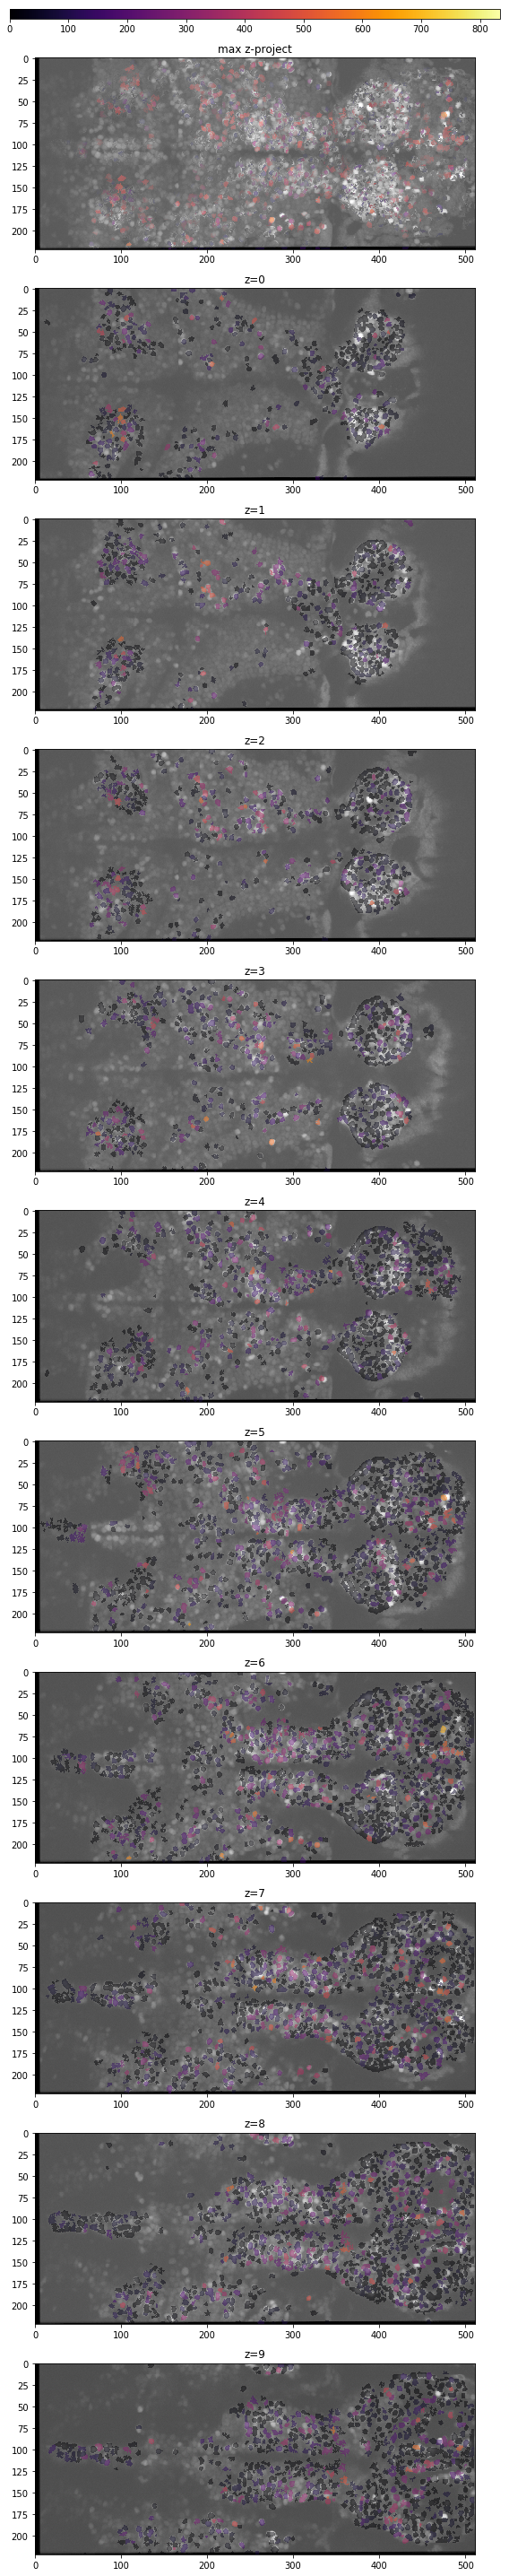

In [80]:
plotDeltaInputBrainMap(fvals[0], fvals[2], df, target_bndx, Z, back_img, np.mean);

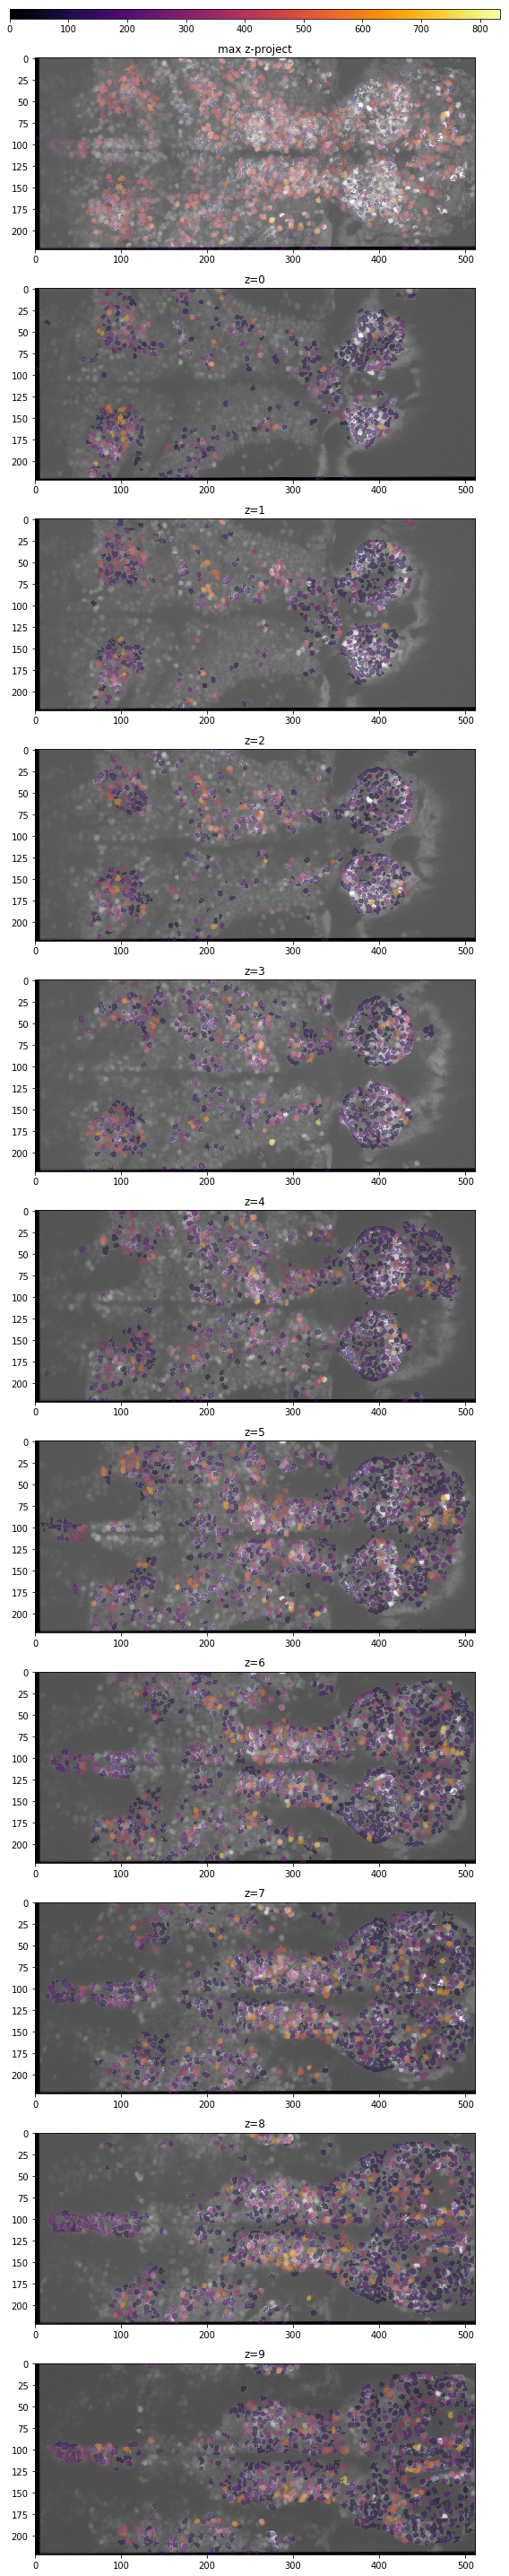

In [73]:
plotInputBrainMap(fvals[0], df, target_bndx, Z, back_img, np.mean);

In [95]:
target_name = "r_raphe"
target_bndx = np.array(df["in_"+target_name])
region_bndxs = [np.array(df[r]) for r in regions]
o = plotInputChordDiagram(fvals, target_bndx, region_bndxs,
                                          target_name, region_names,
                          lambda x: sum(x>1.5), 1, integer=True)
dat, links, nodes = o

In [96]:
options = {"Chord": {"label_index": 'name', "color_index": 'name', "edge_color_index": 'source', 
          "cmap": 'Category20', "edge_cmap": 'Category20'}}
fig = hv.Chord((links.query('group==0'), nodes), ['source', 'target'], ['value']).options(options)
fig

:Chord   [source,target]   (value)

In [86]:
hv.output(fig, filename="test.svg")

:Chord   [source,target]   (value)

In [78]:
fig

:Chord   [source,target]   (value)

In [281]:
dat, links, nodes = plotDeltaInputChordDiagram([fvals+100, fvals],
                                               [fvals, fvals*2],
                           target_bndx, region_bndxs, 
                           target_name, region_names, np.mean)